In [37]:
import import_ipynb as inb
import datetime as dt
import EMC_new 
from EMC_new import *
debug_num=0

from matplotlib.lines import Line2D
markers=Line2D.markers.items()


No handles with labels found to put in legend.
No handles with labels found to put in legend.


/home/jbane/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


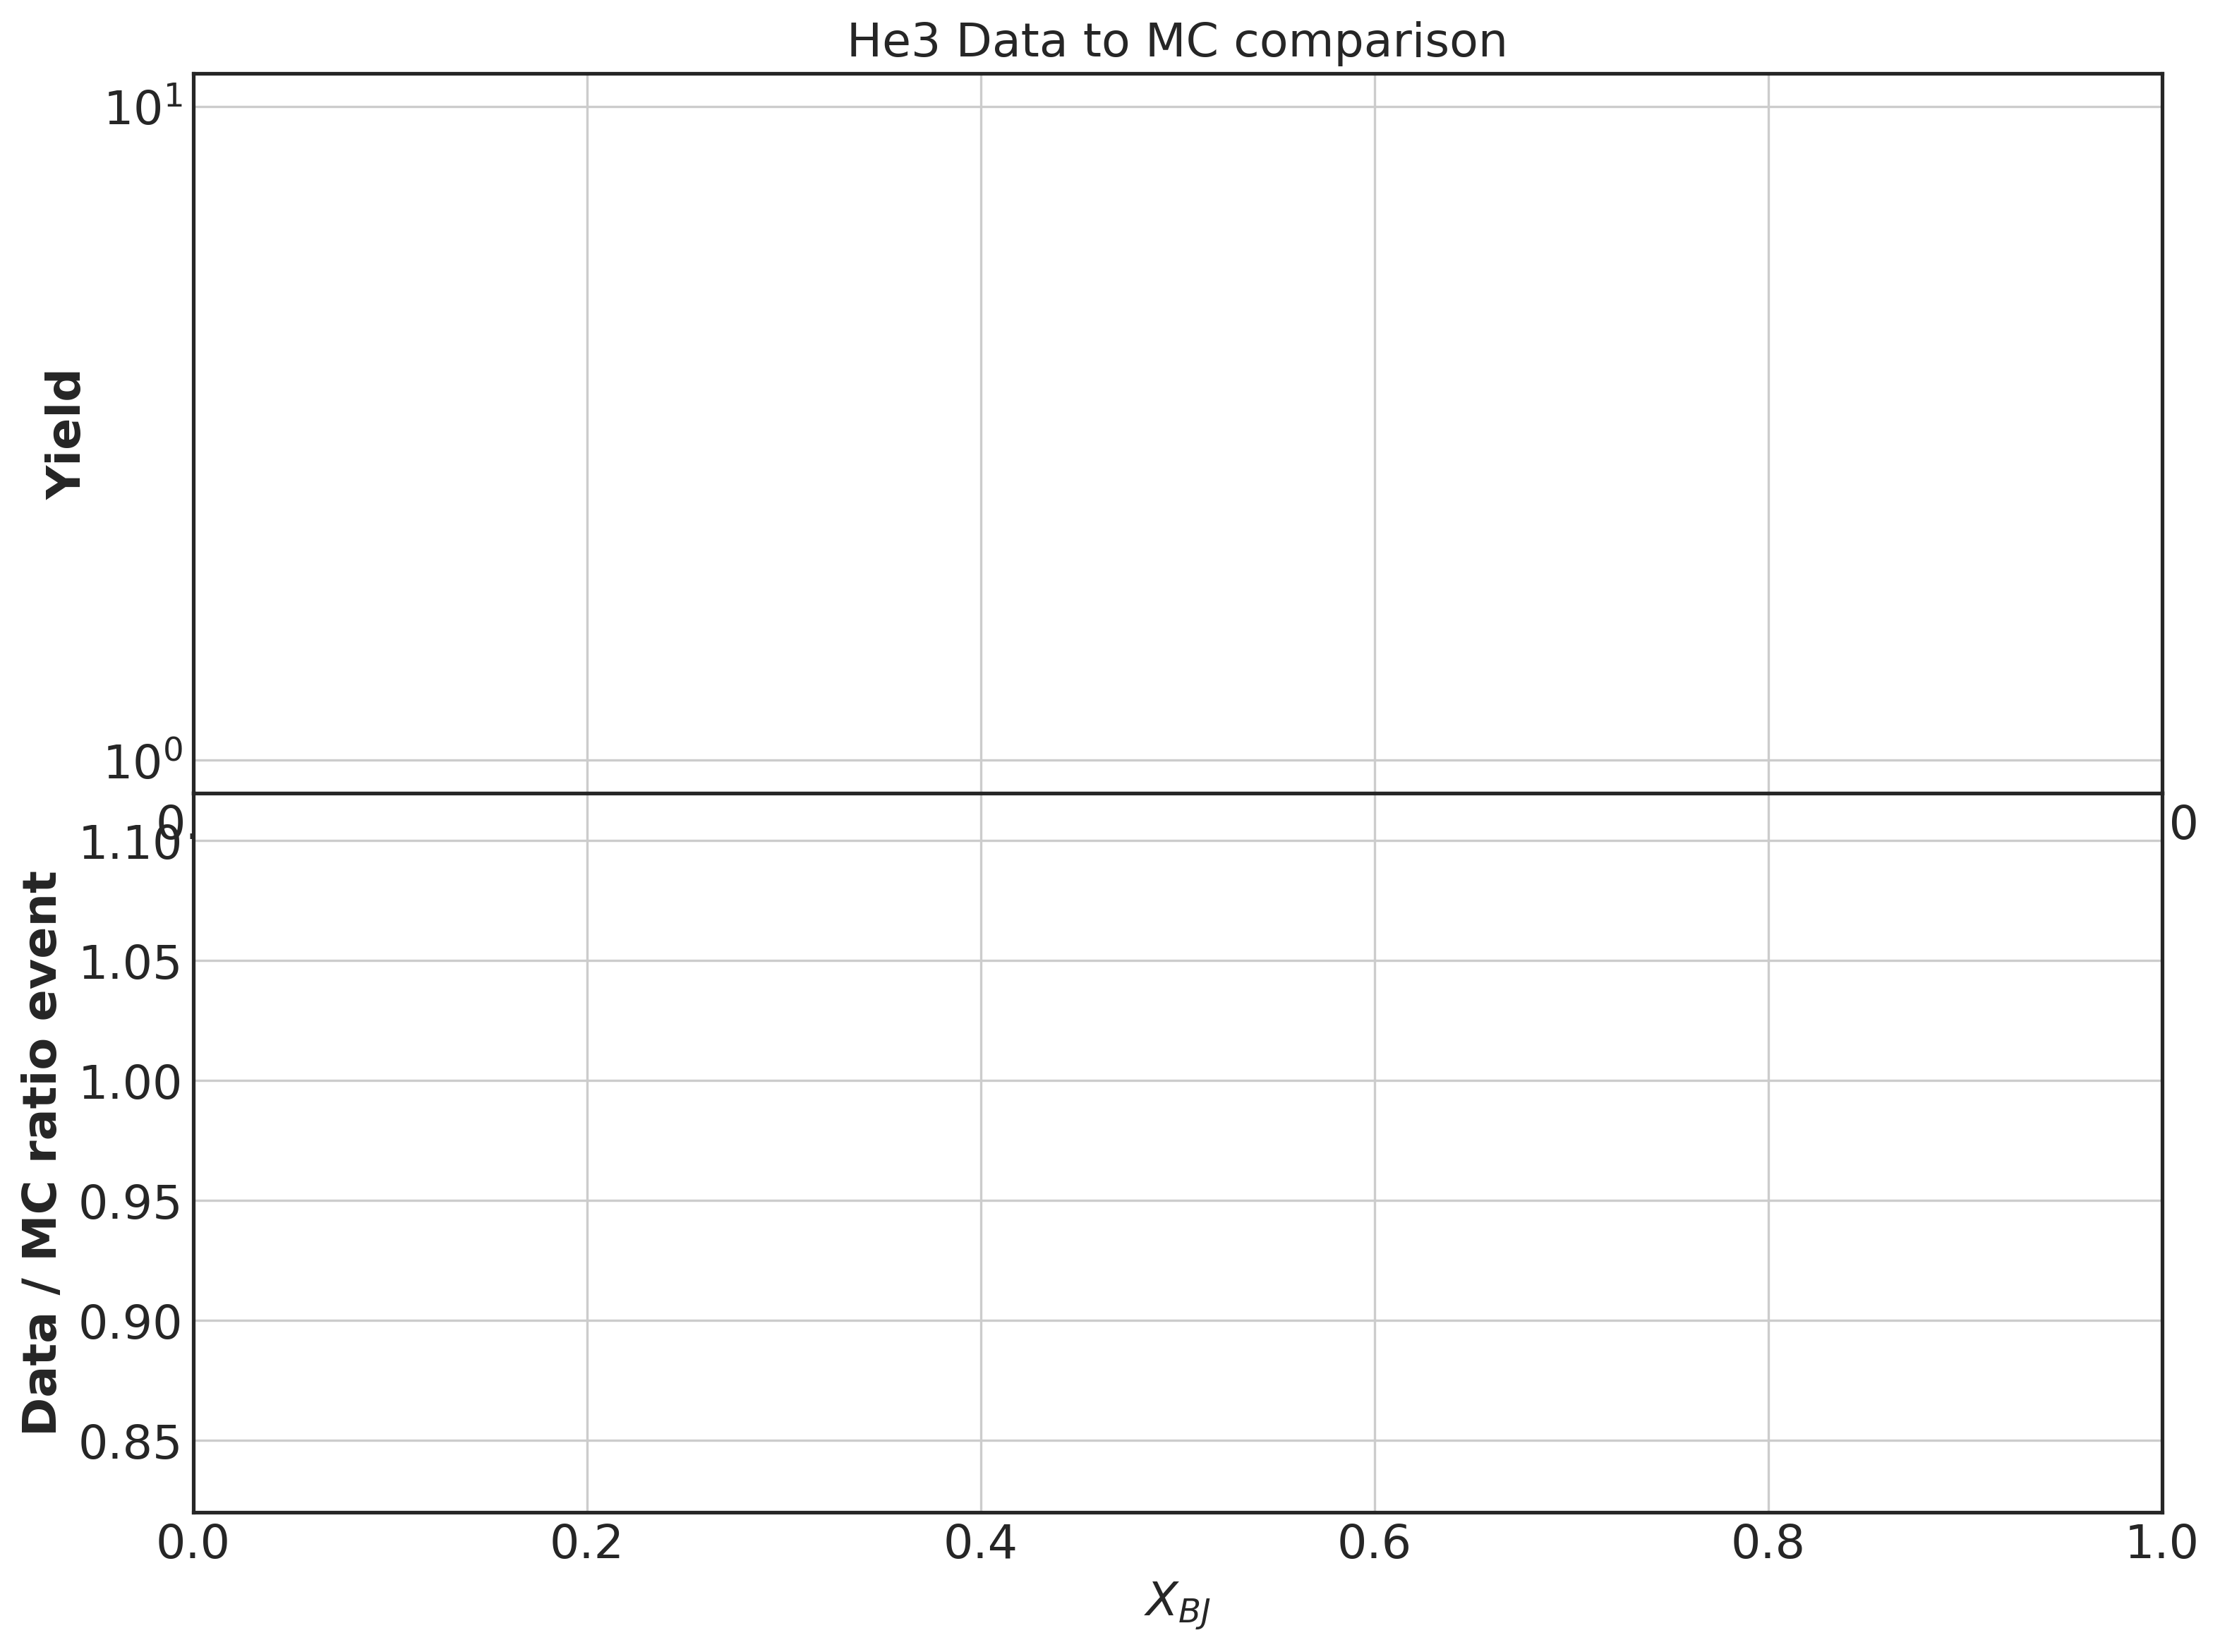

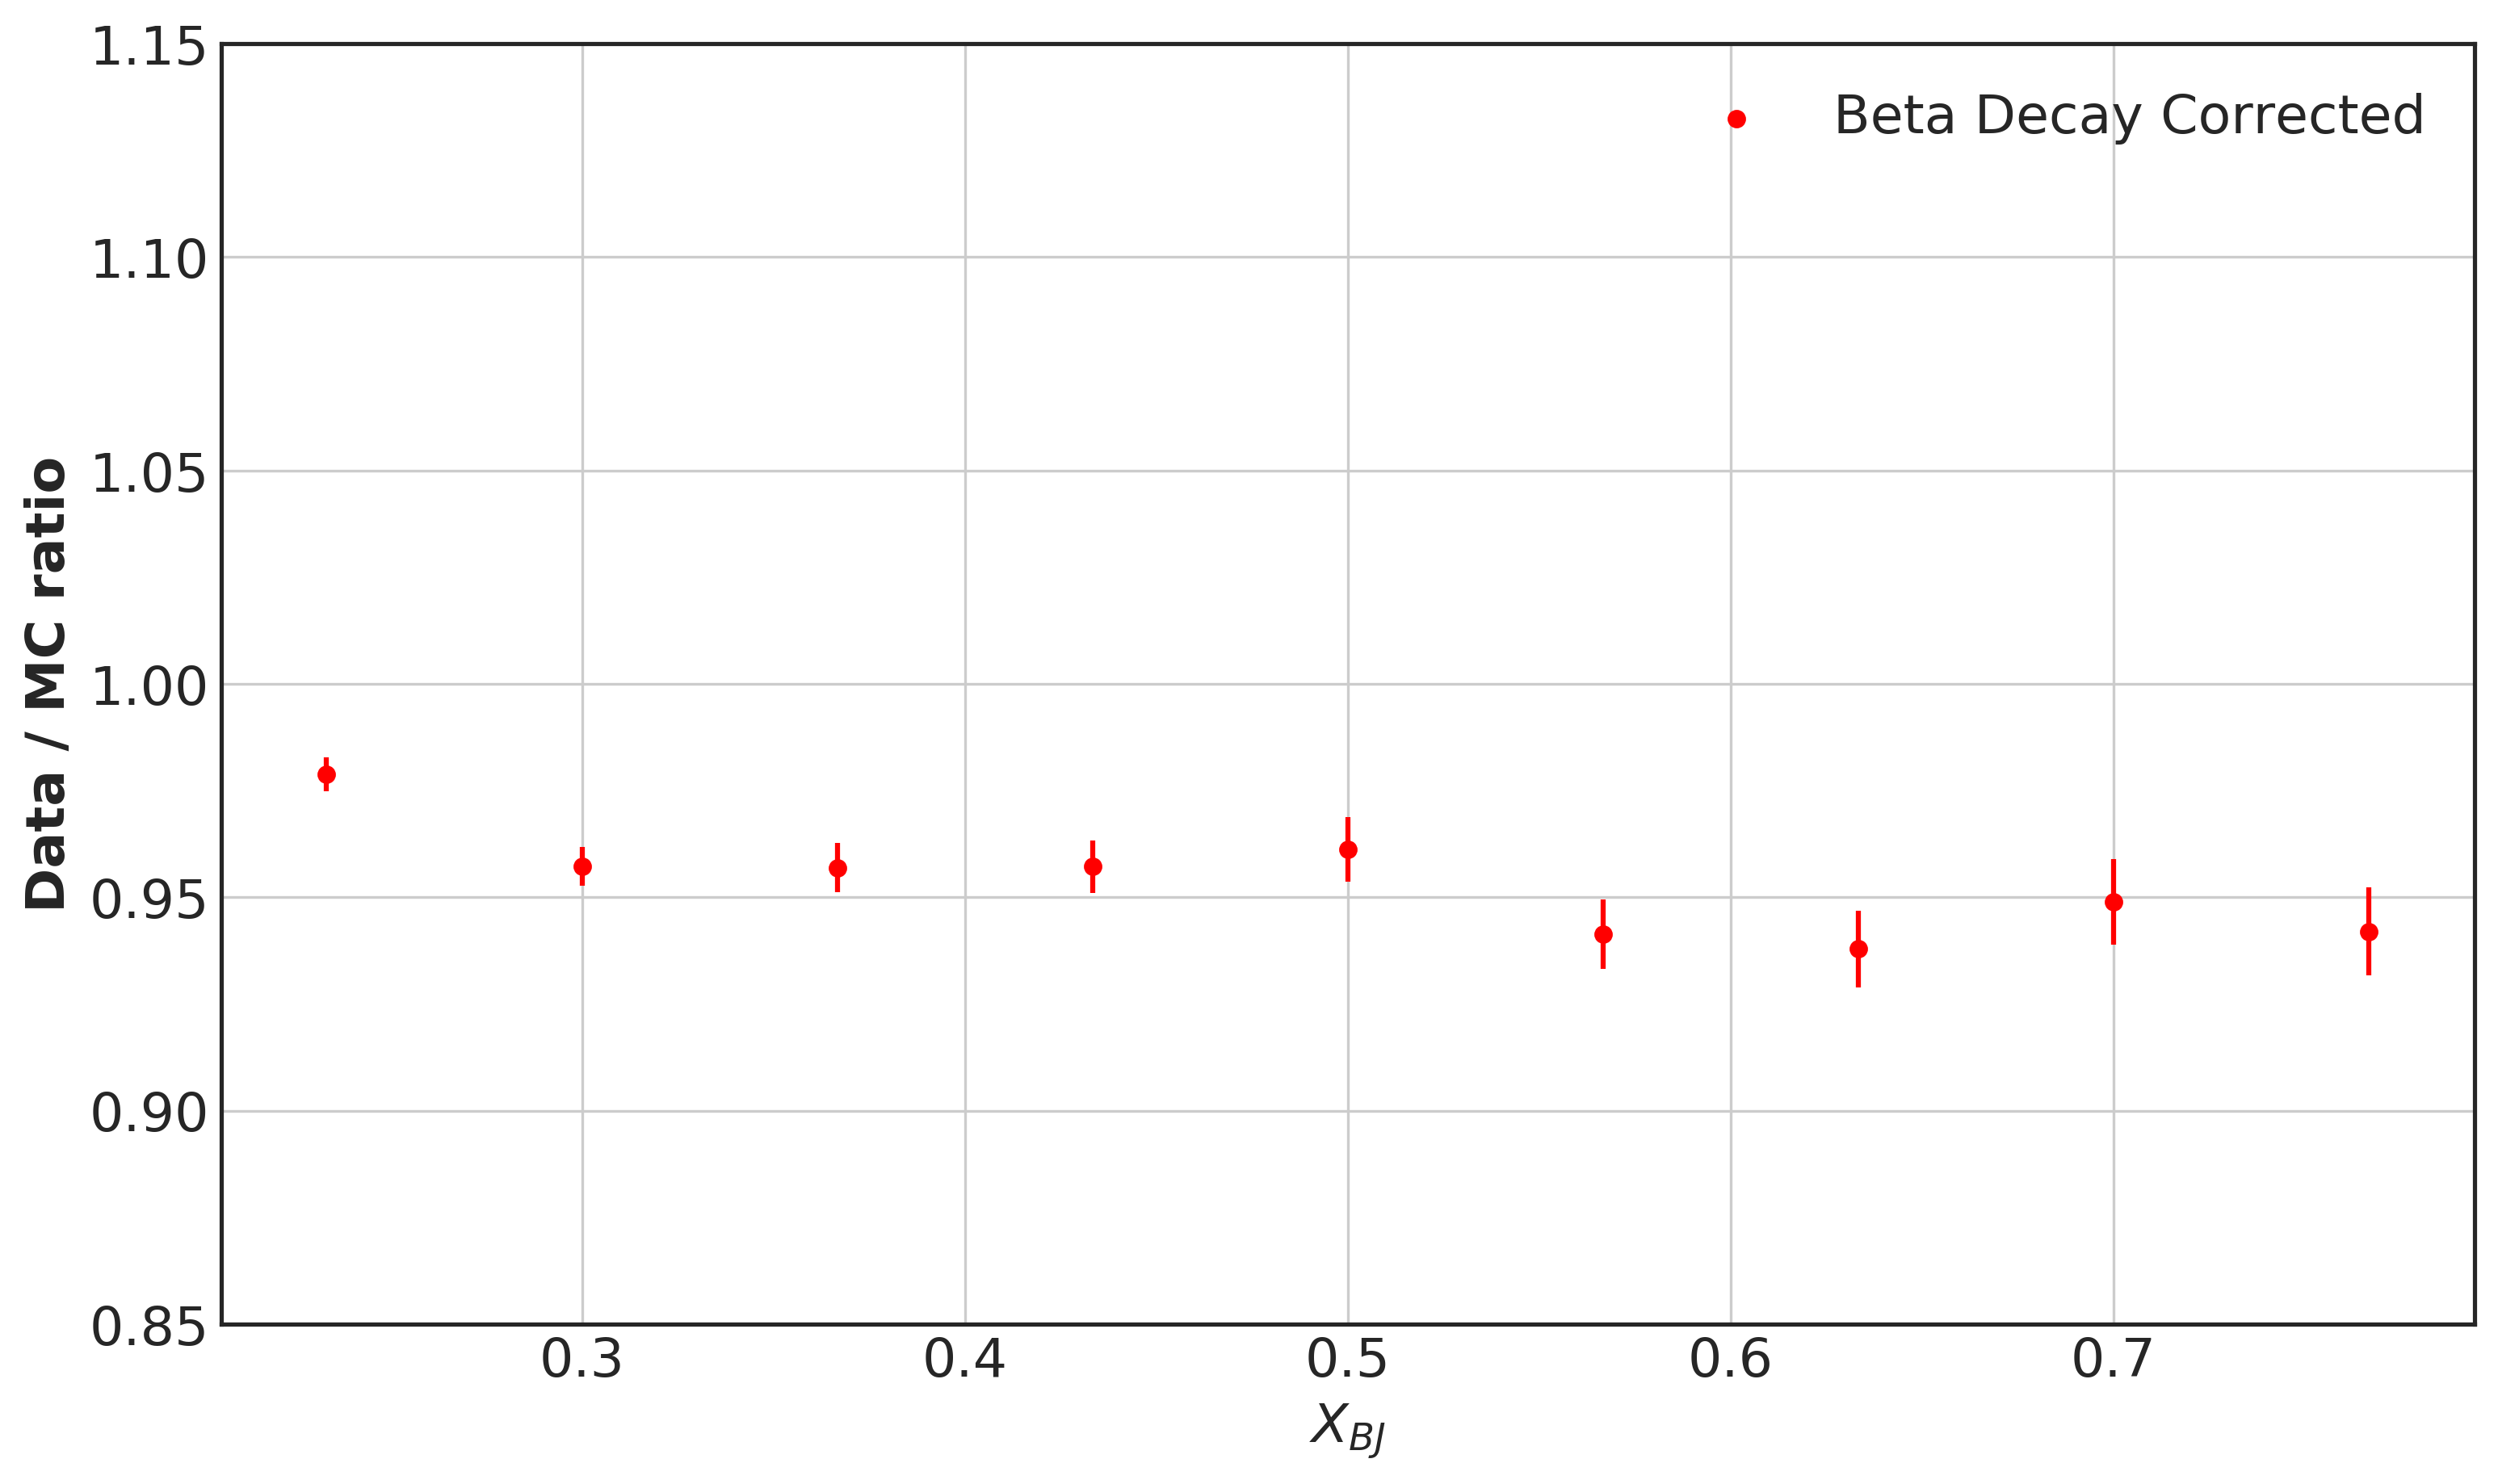

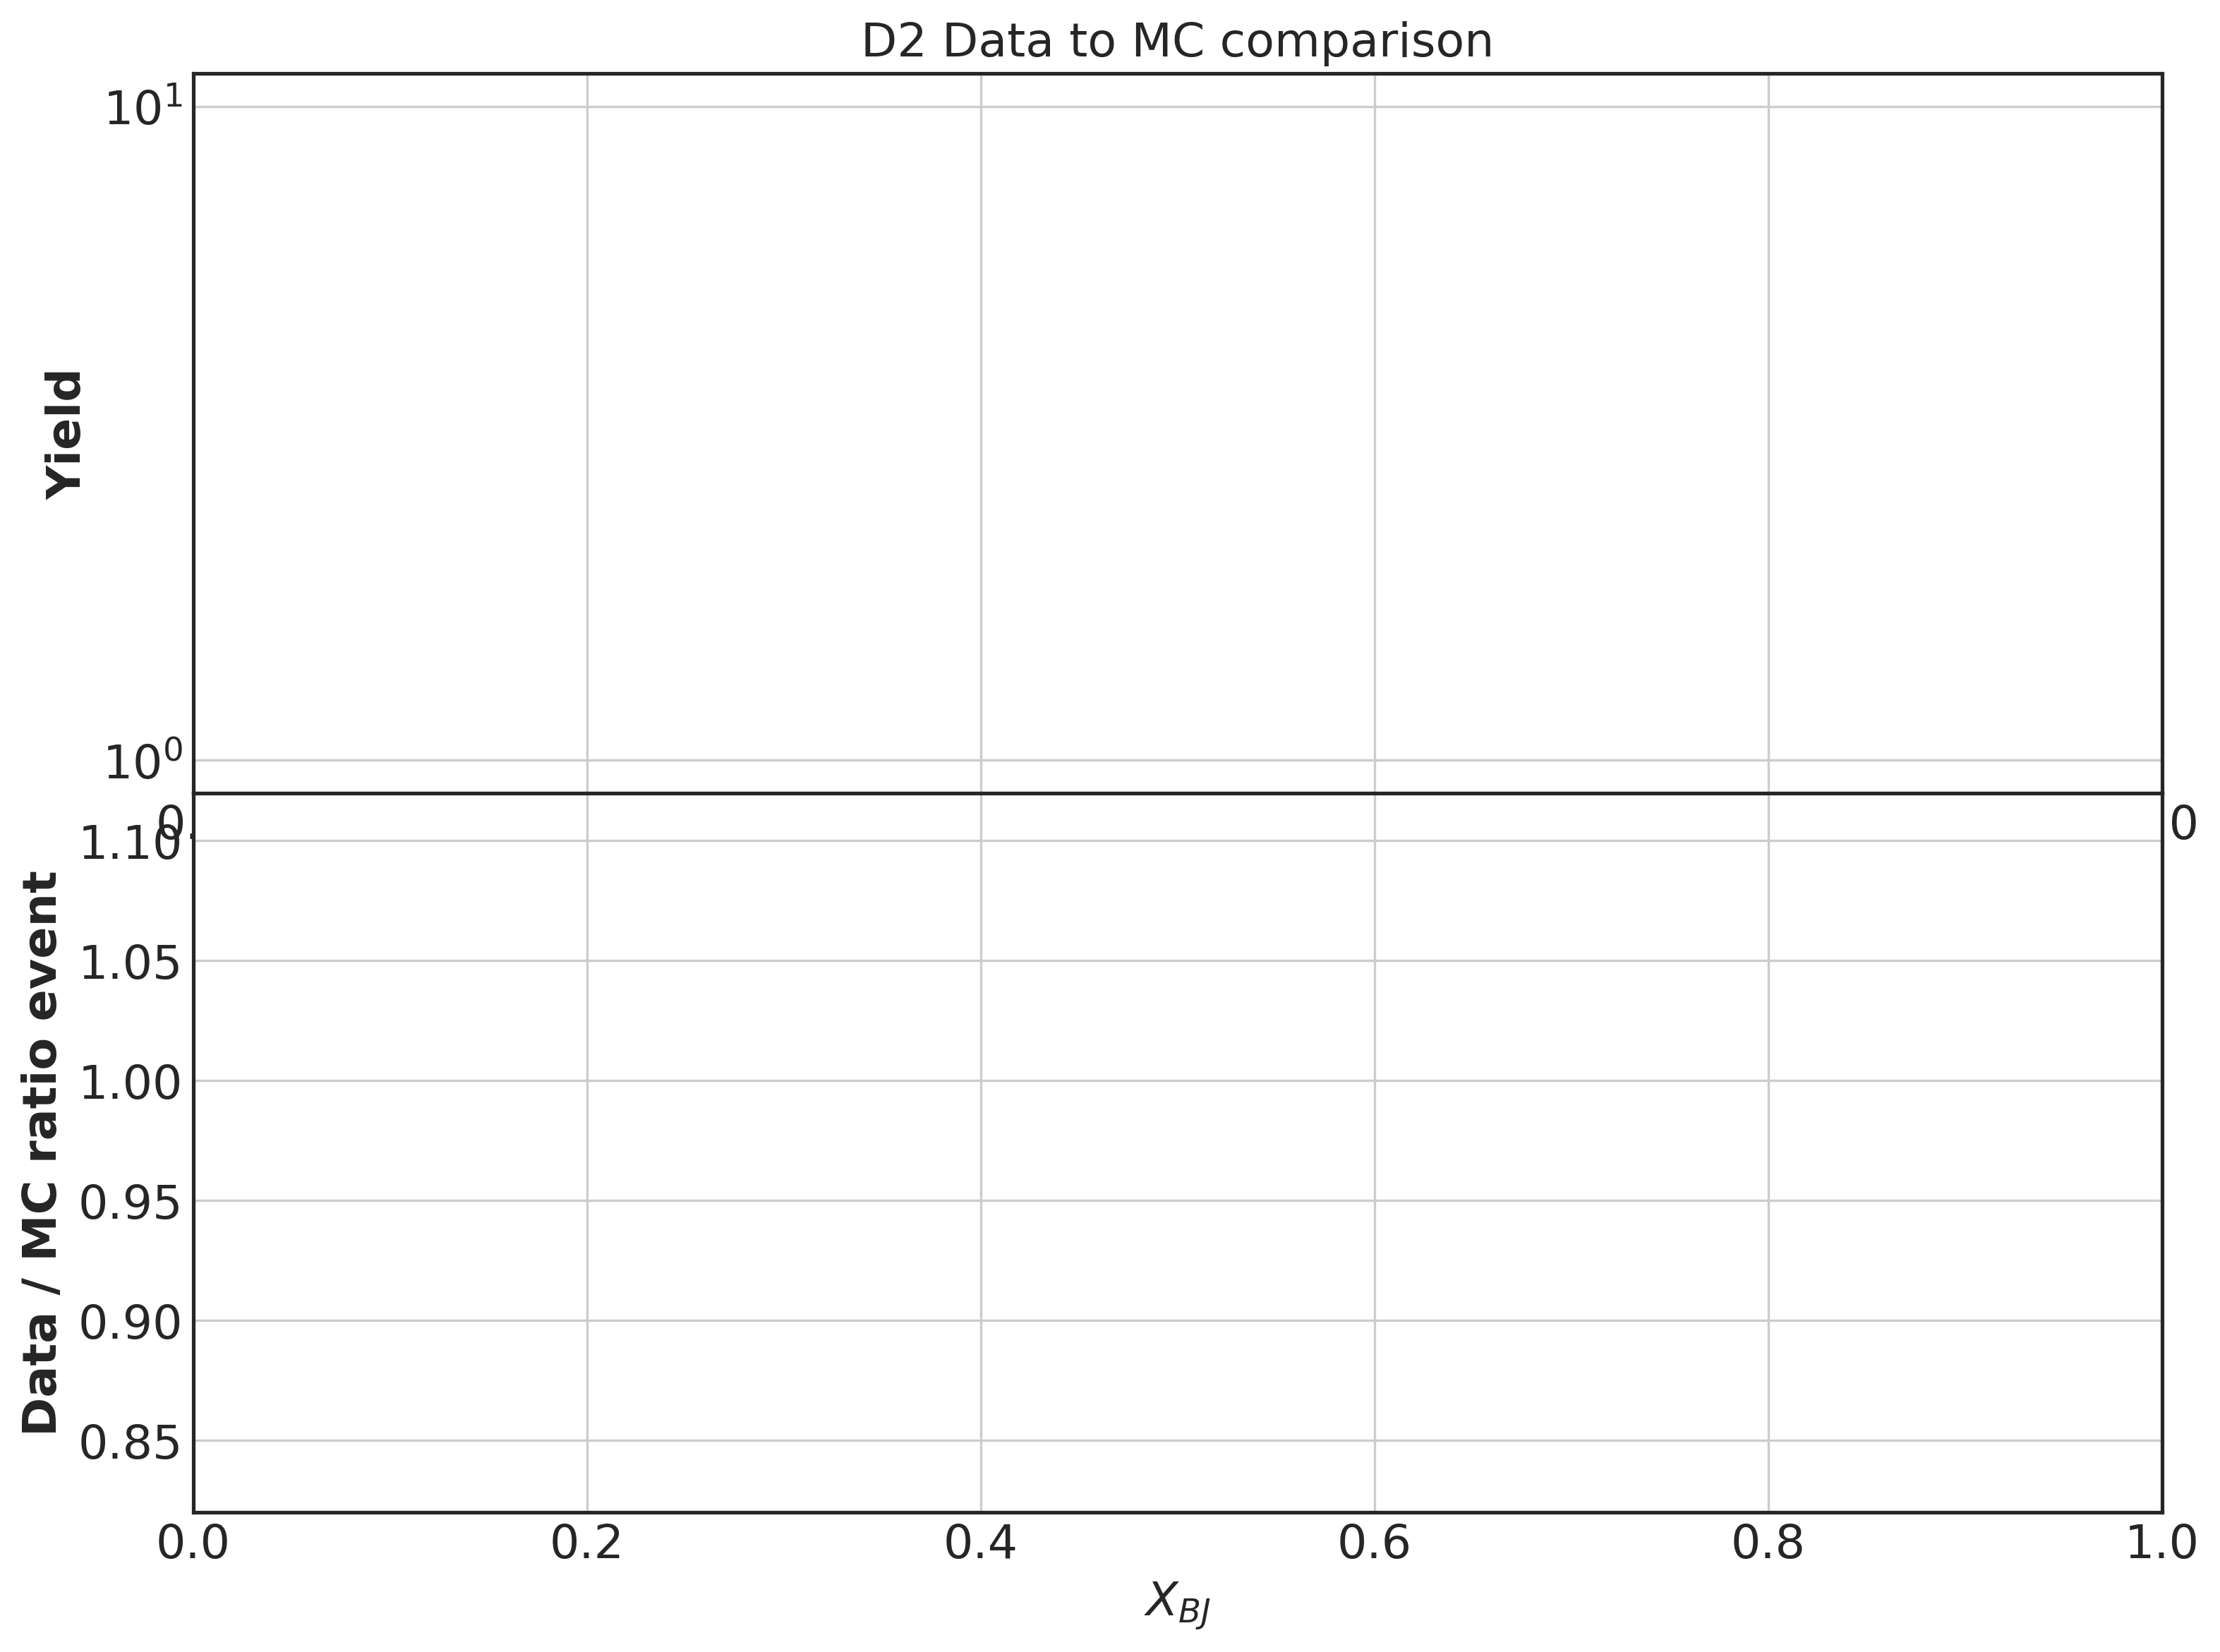

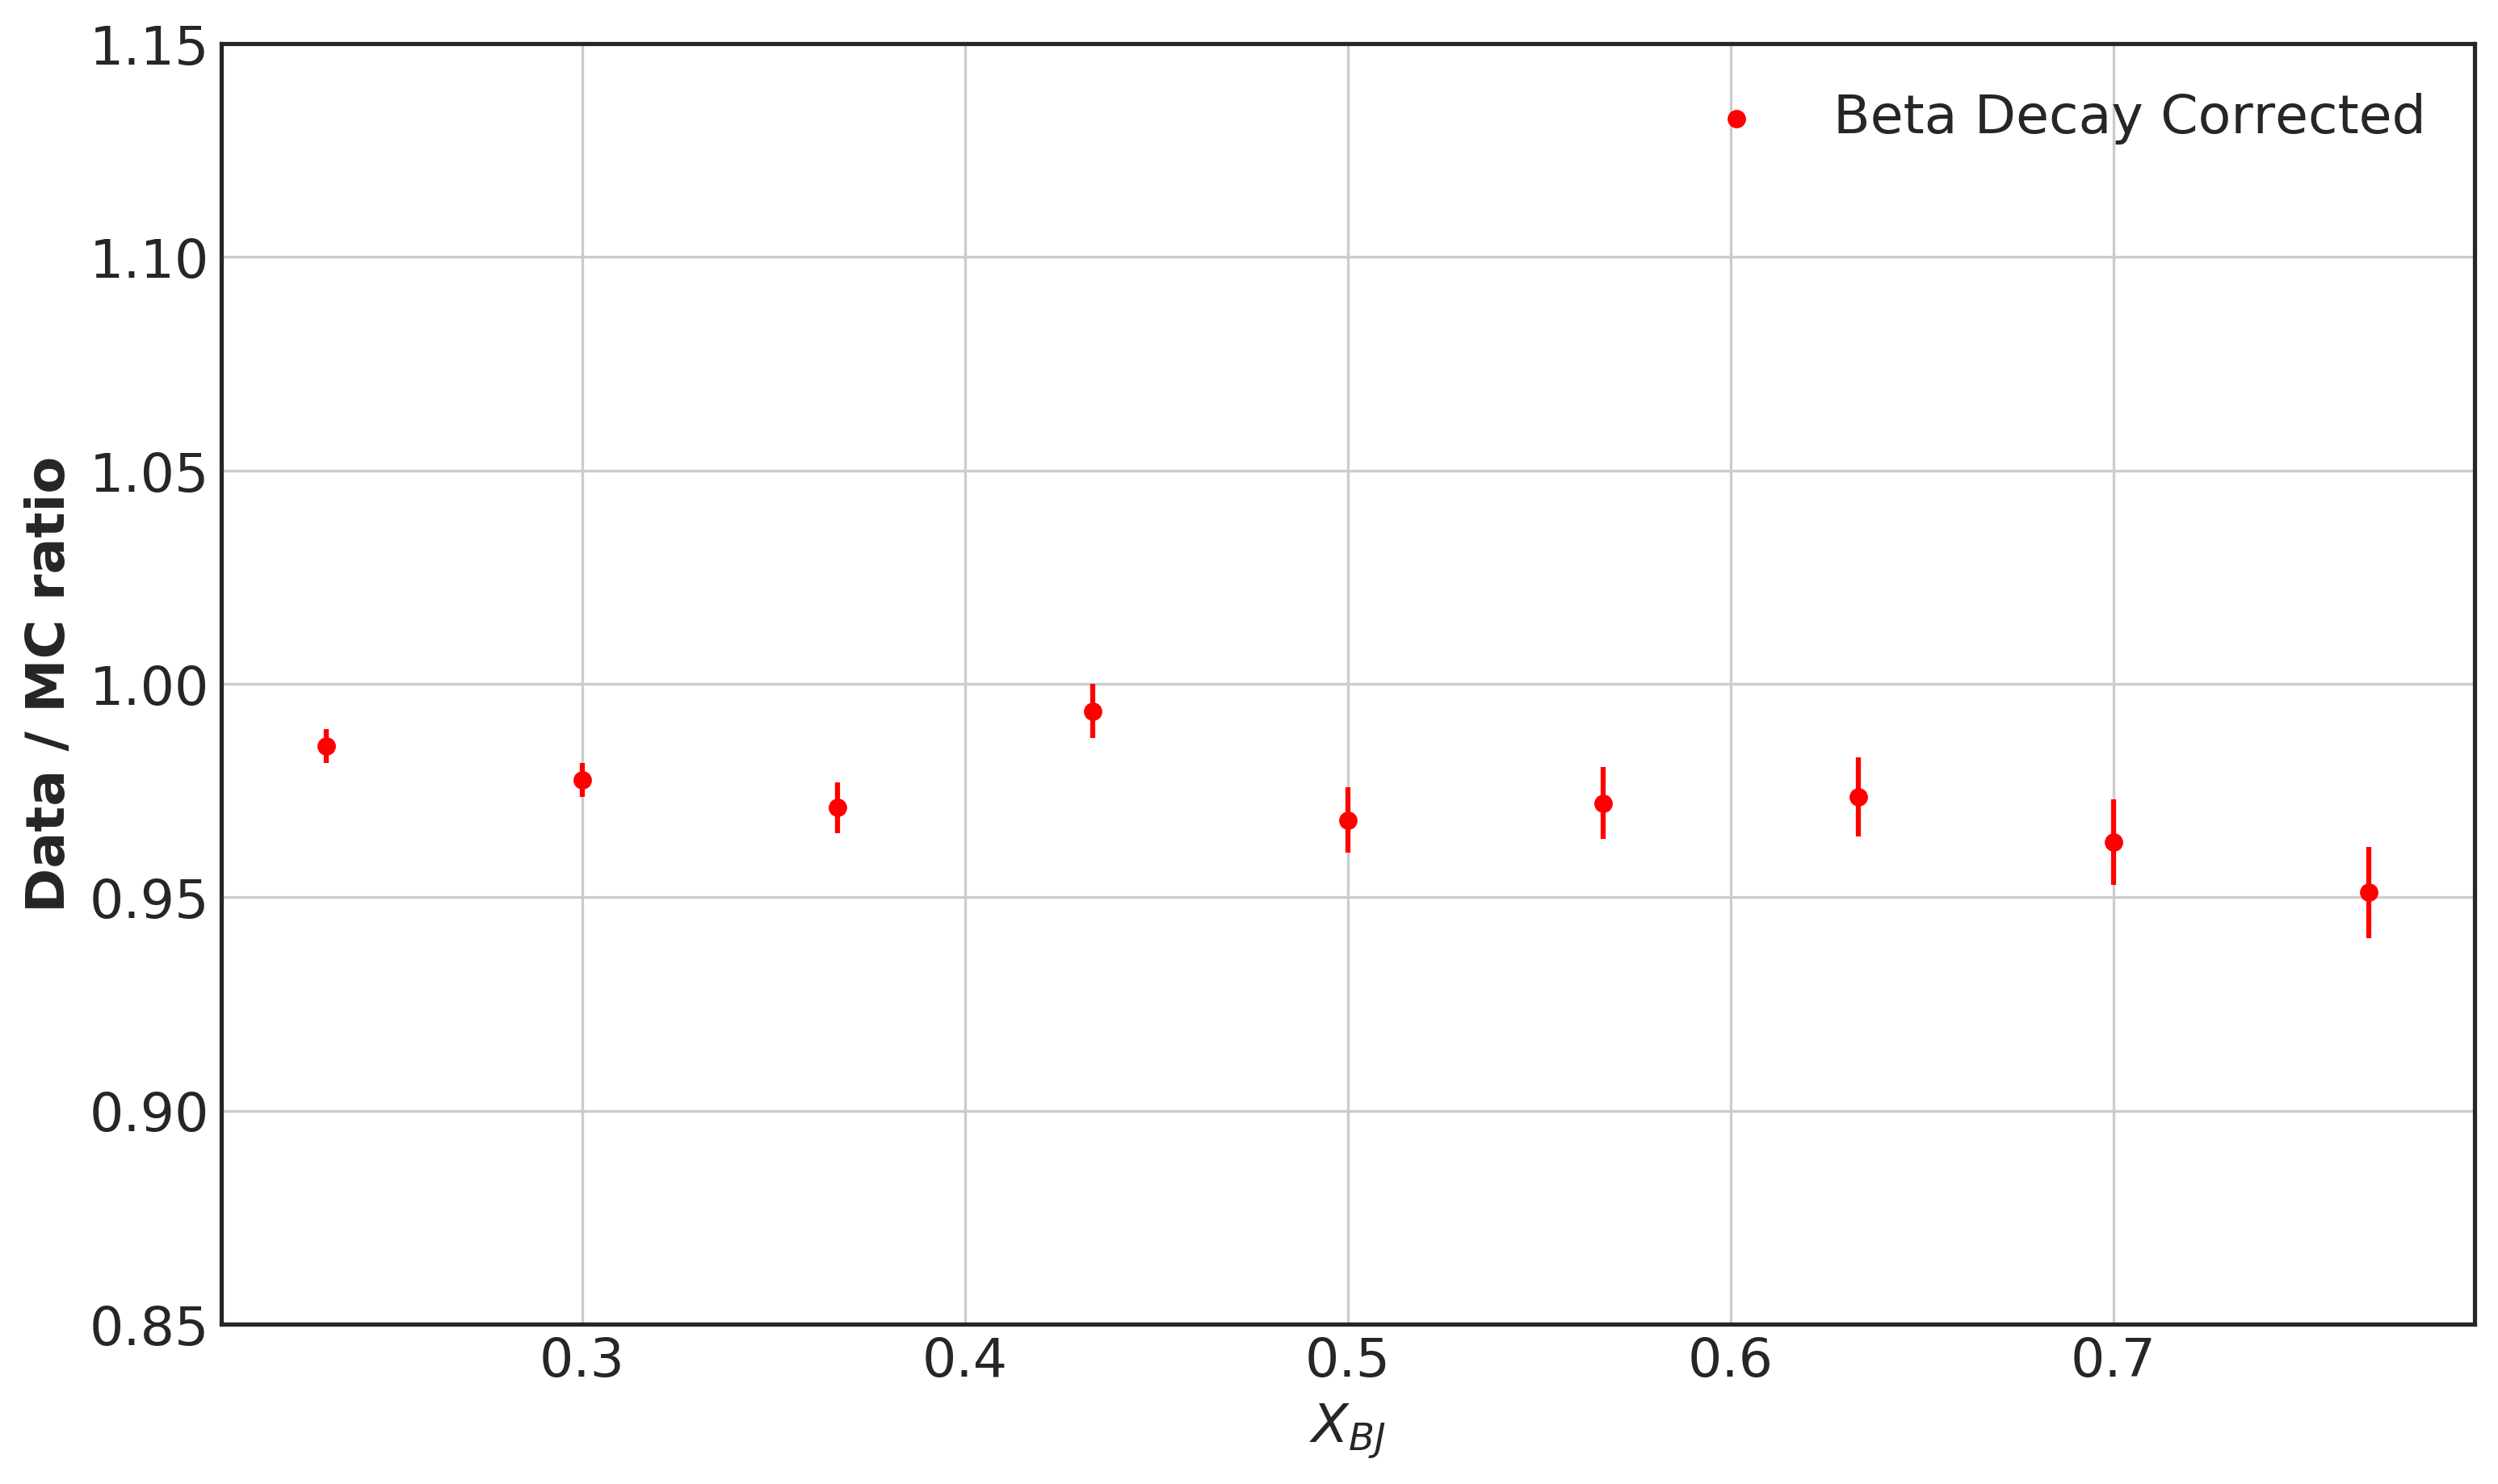

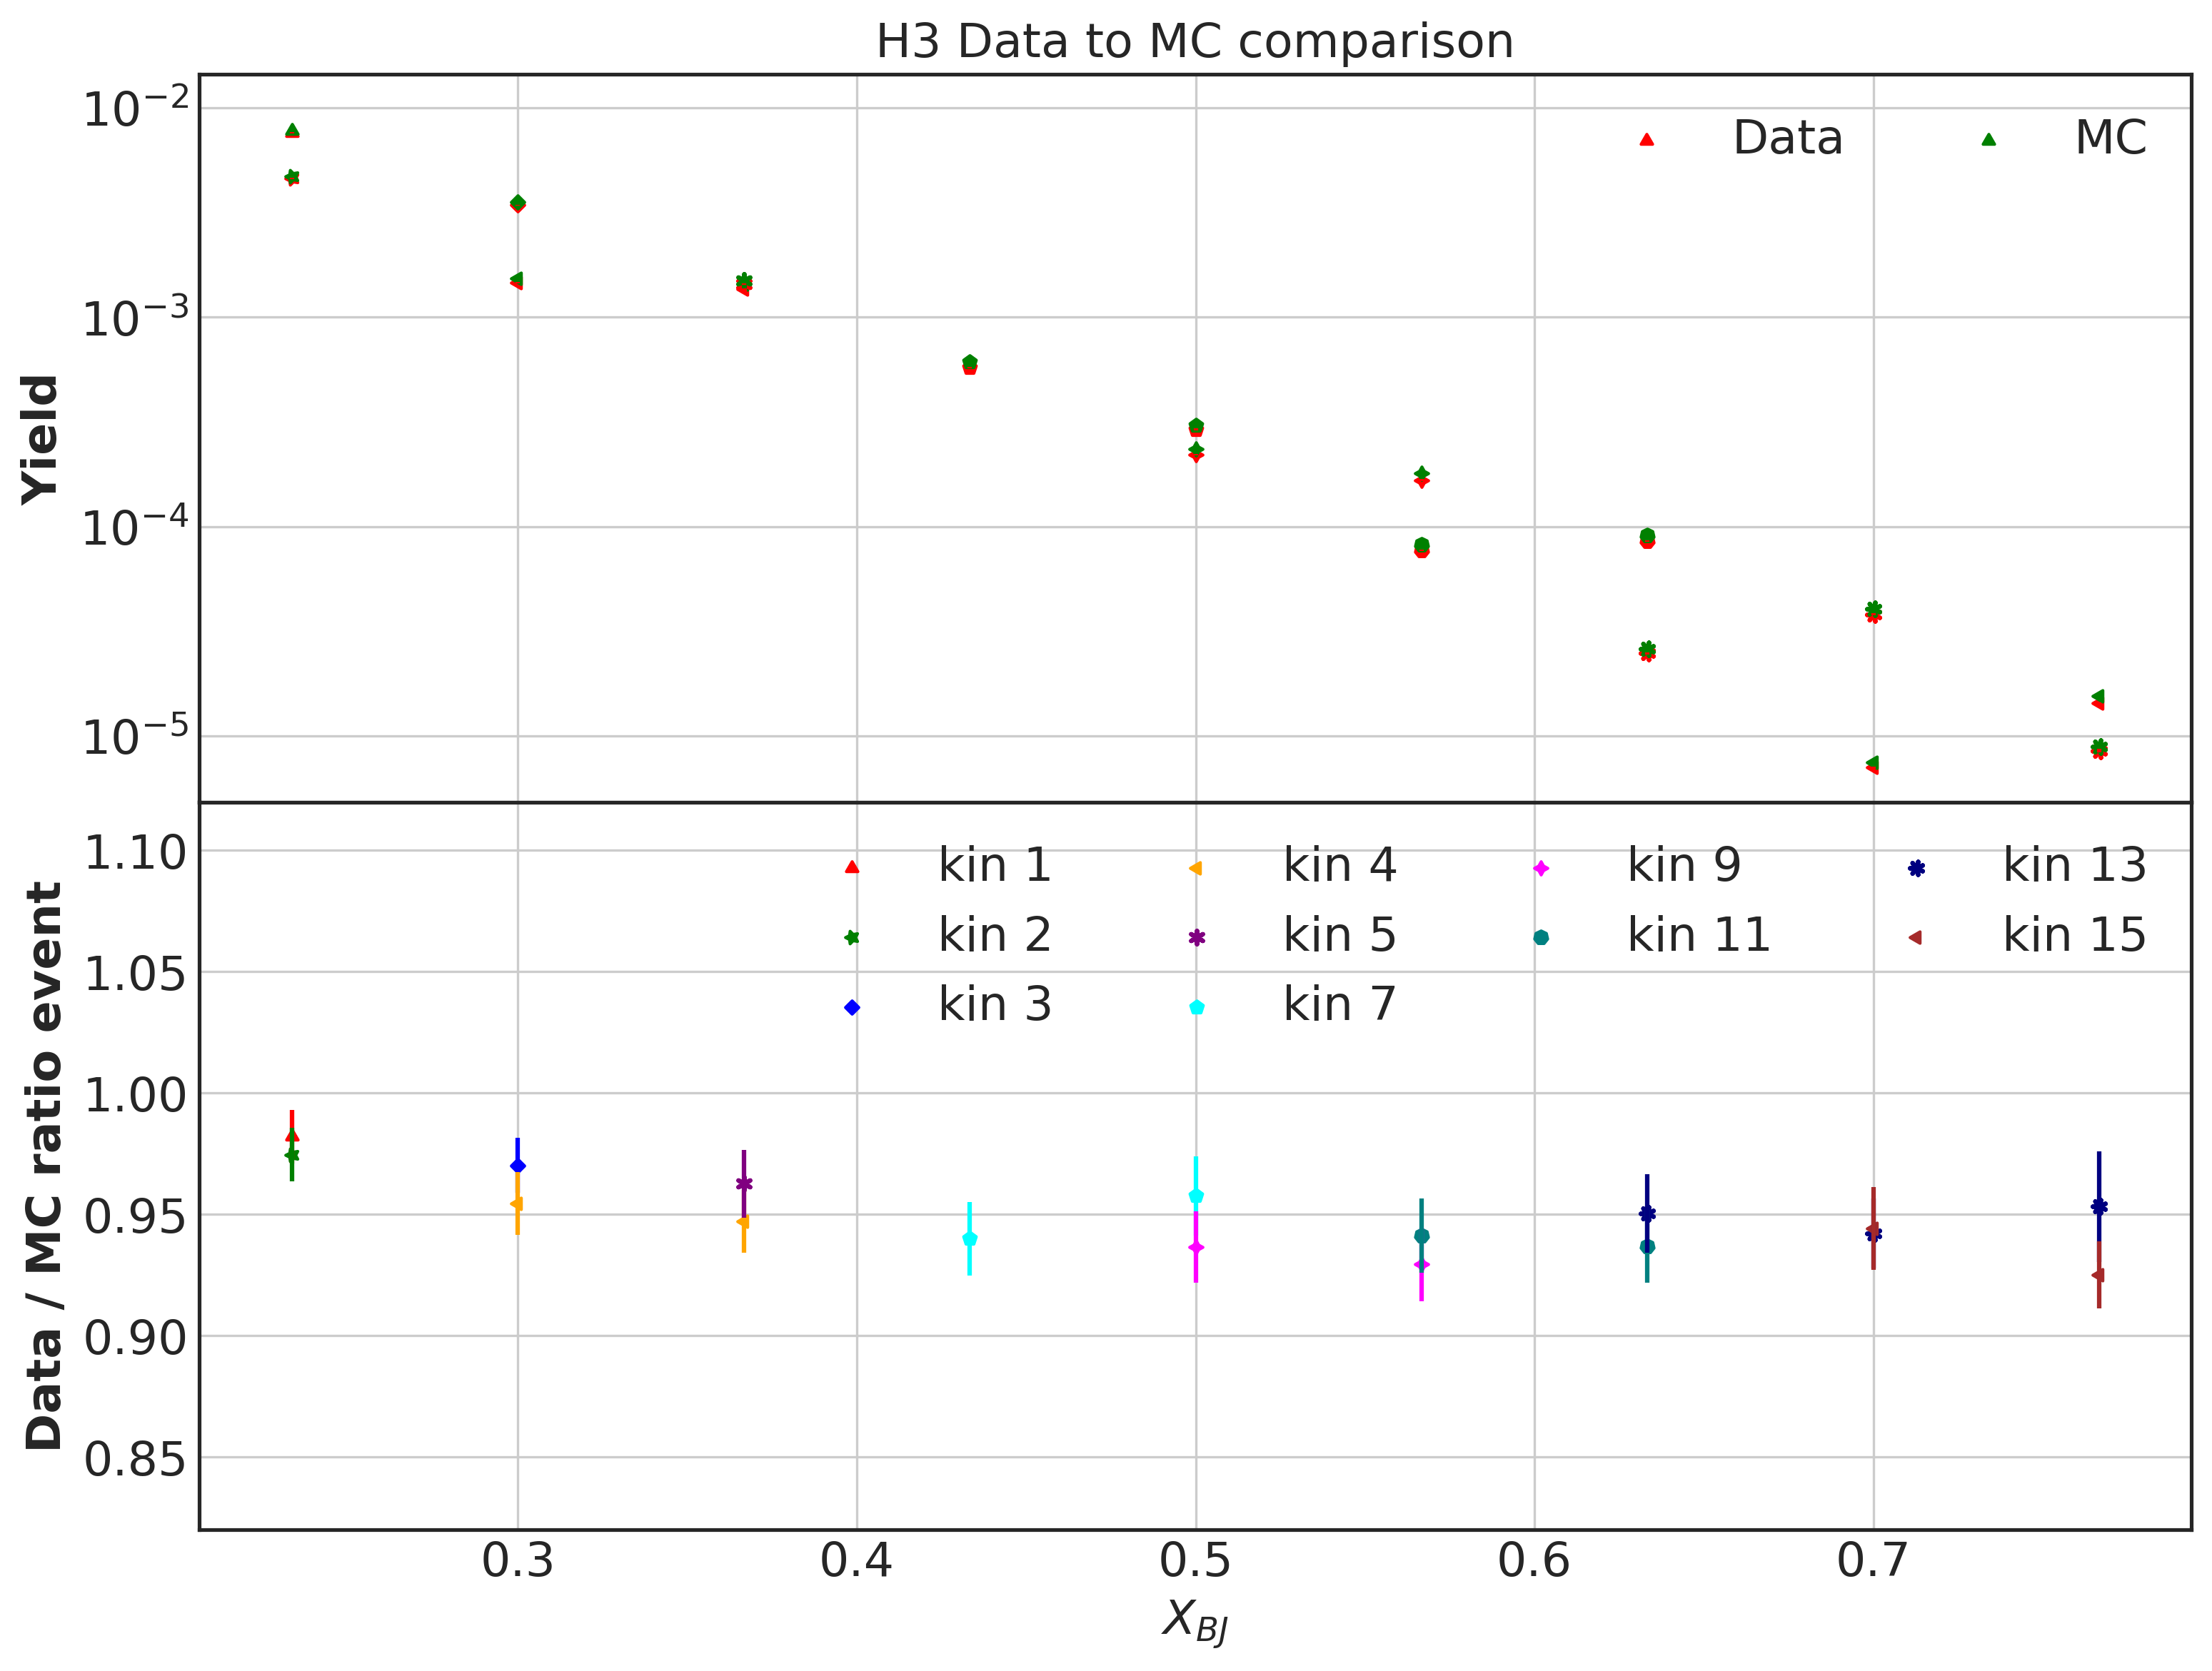

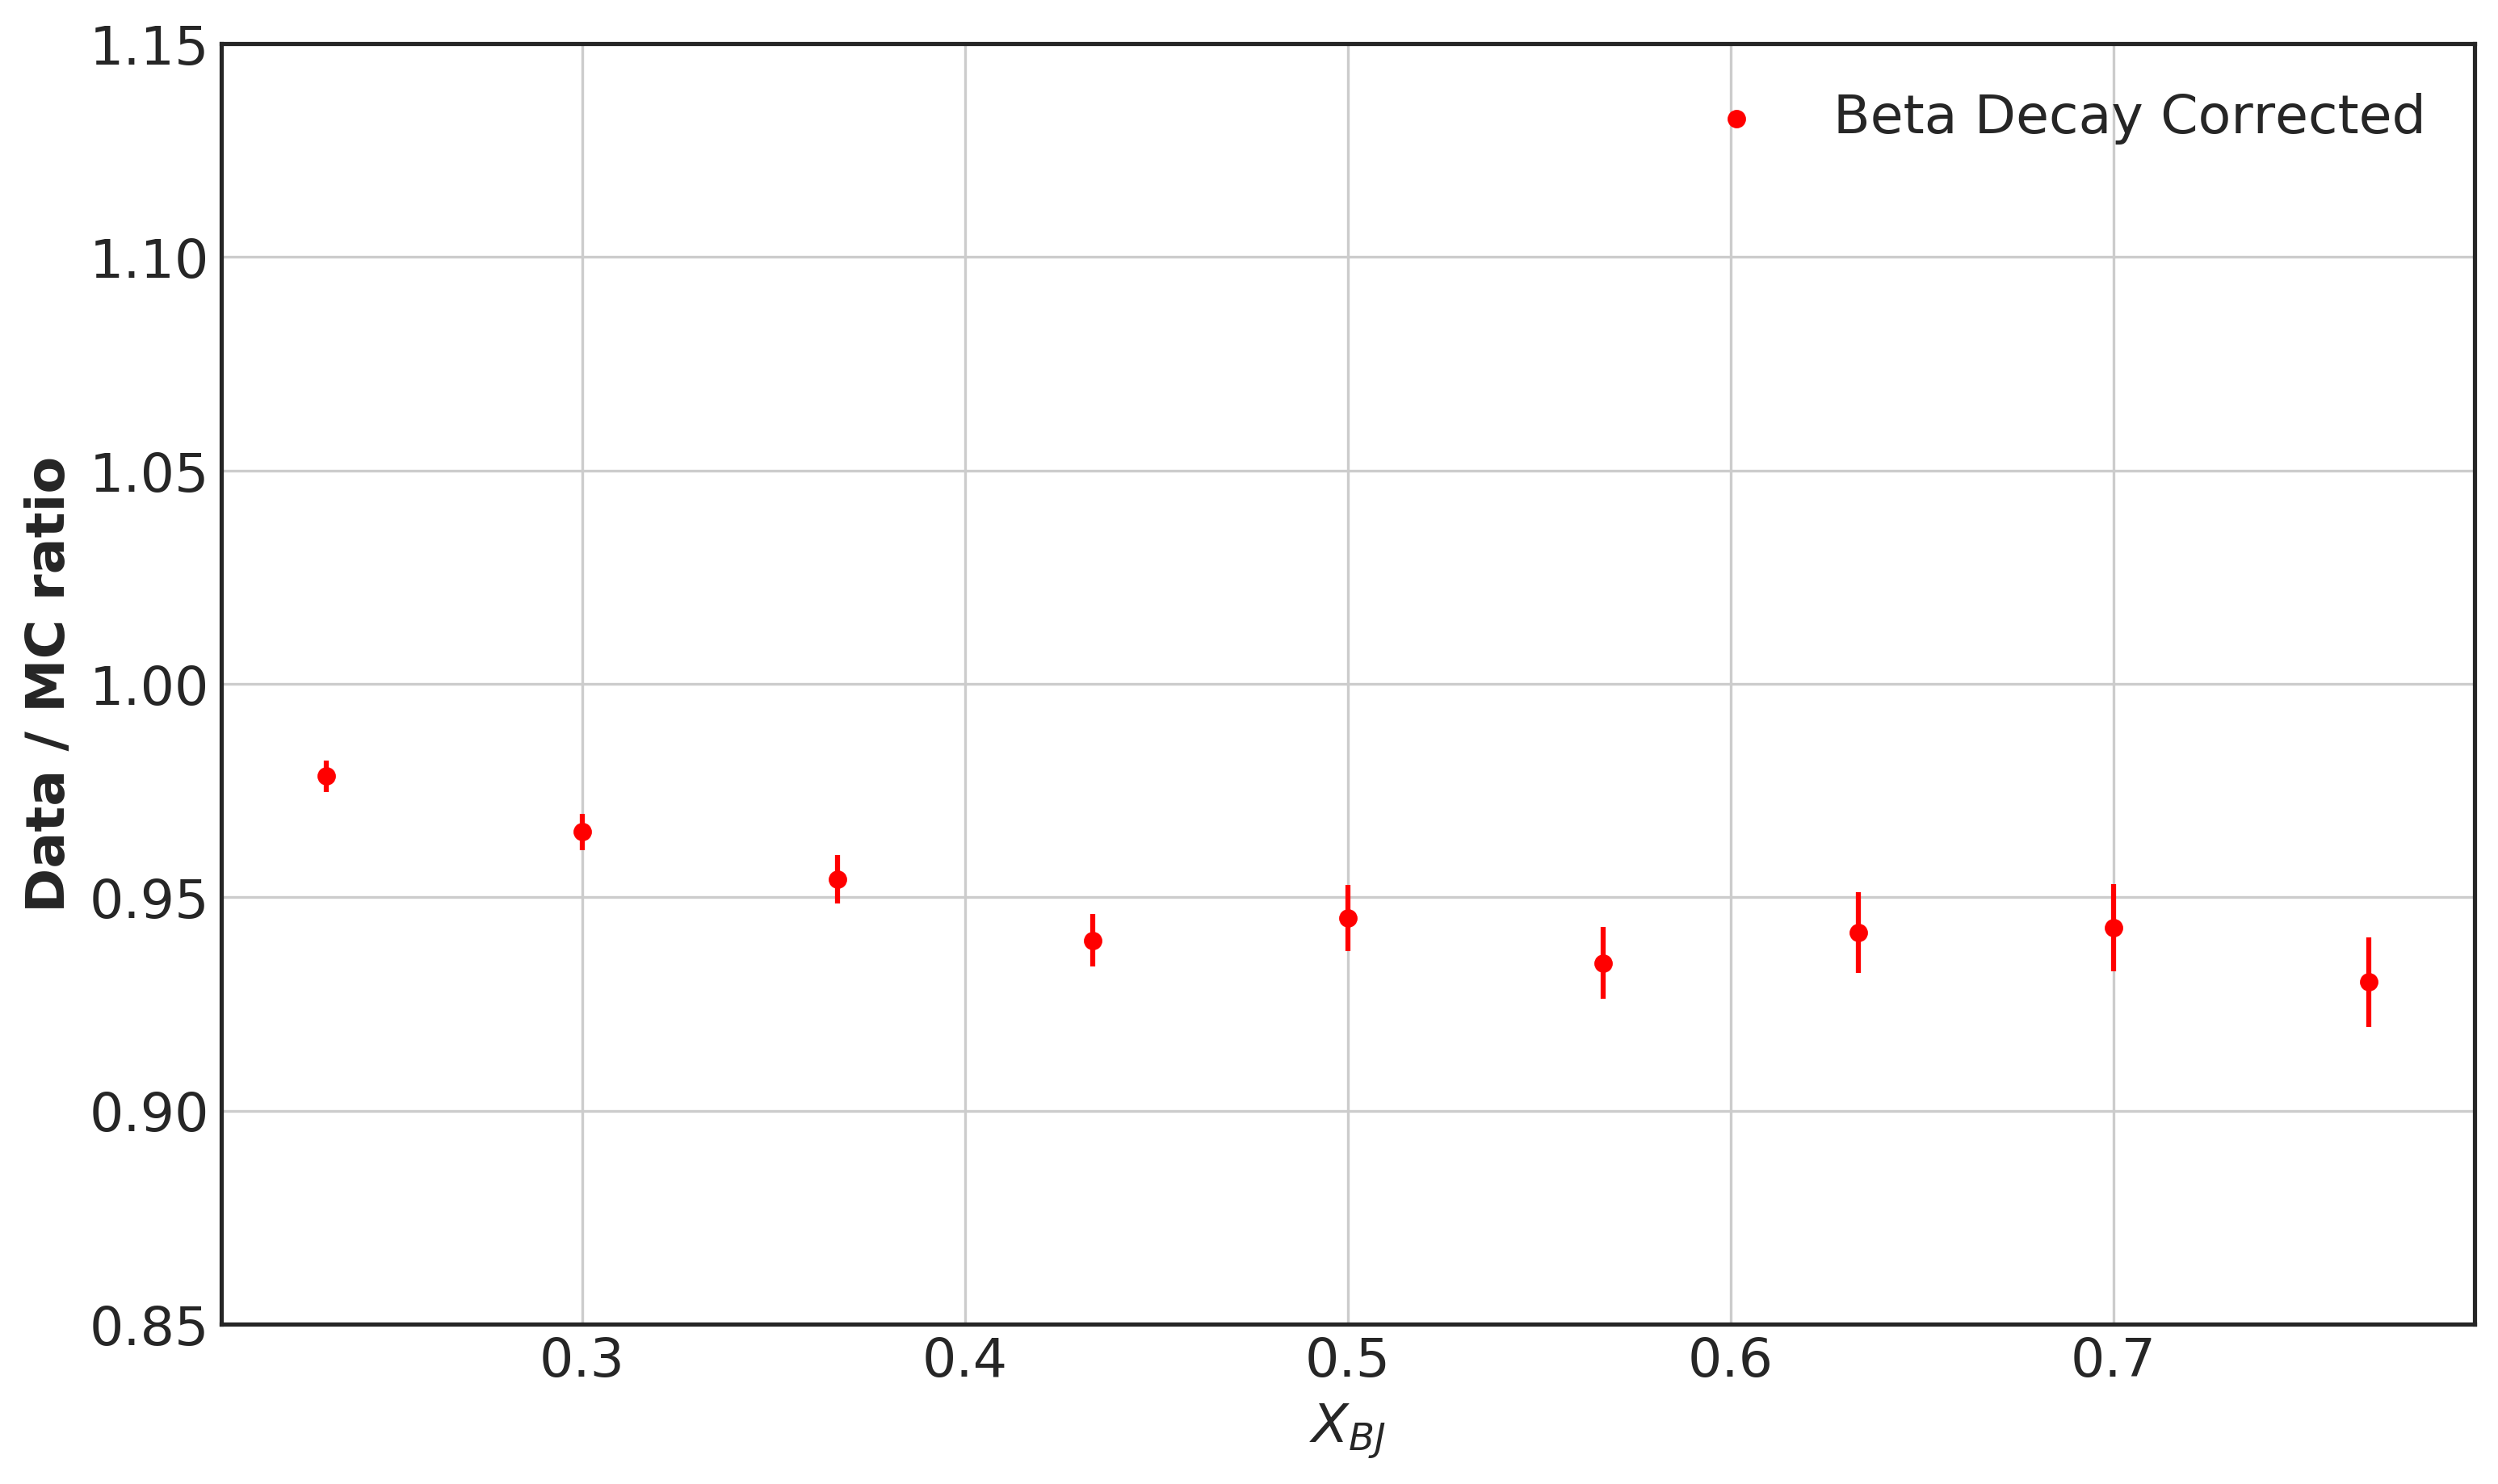

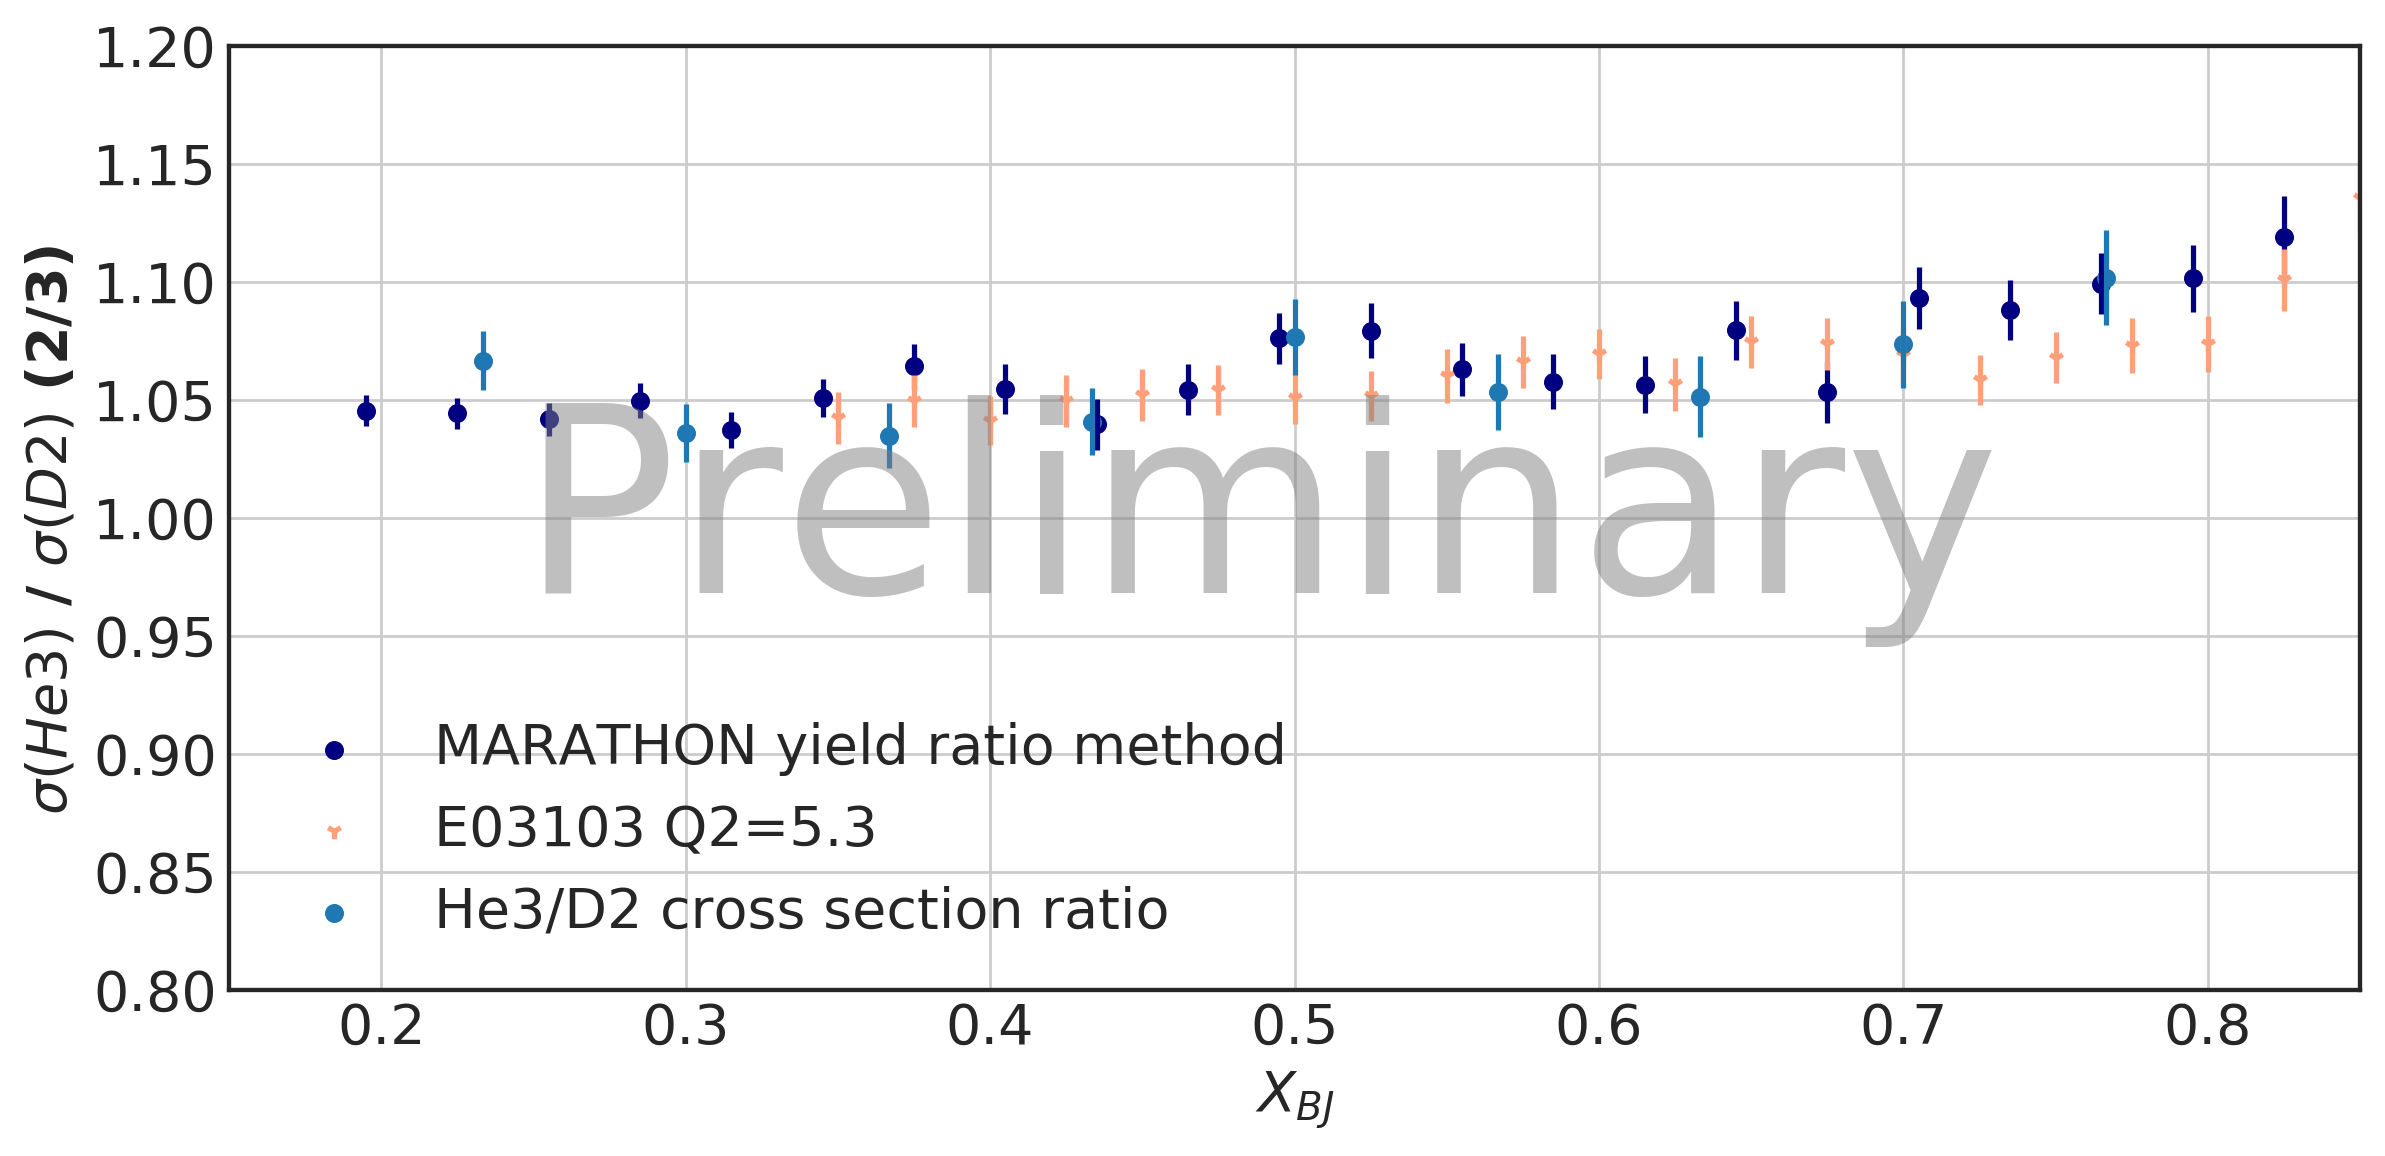

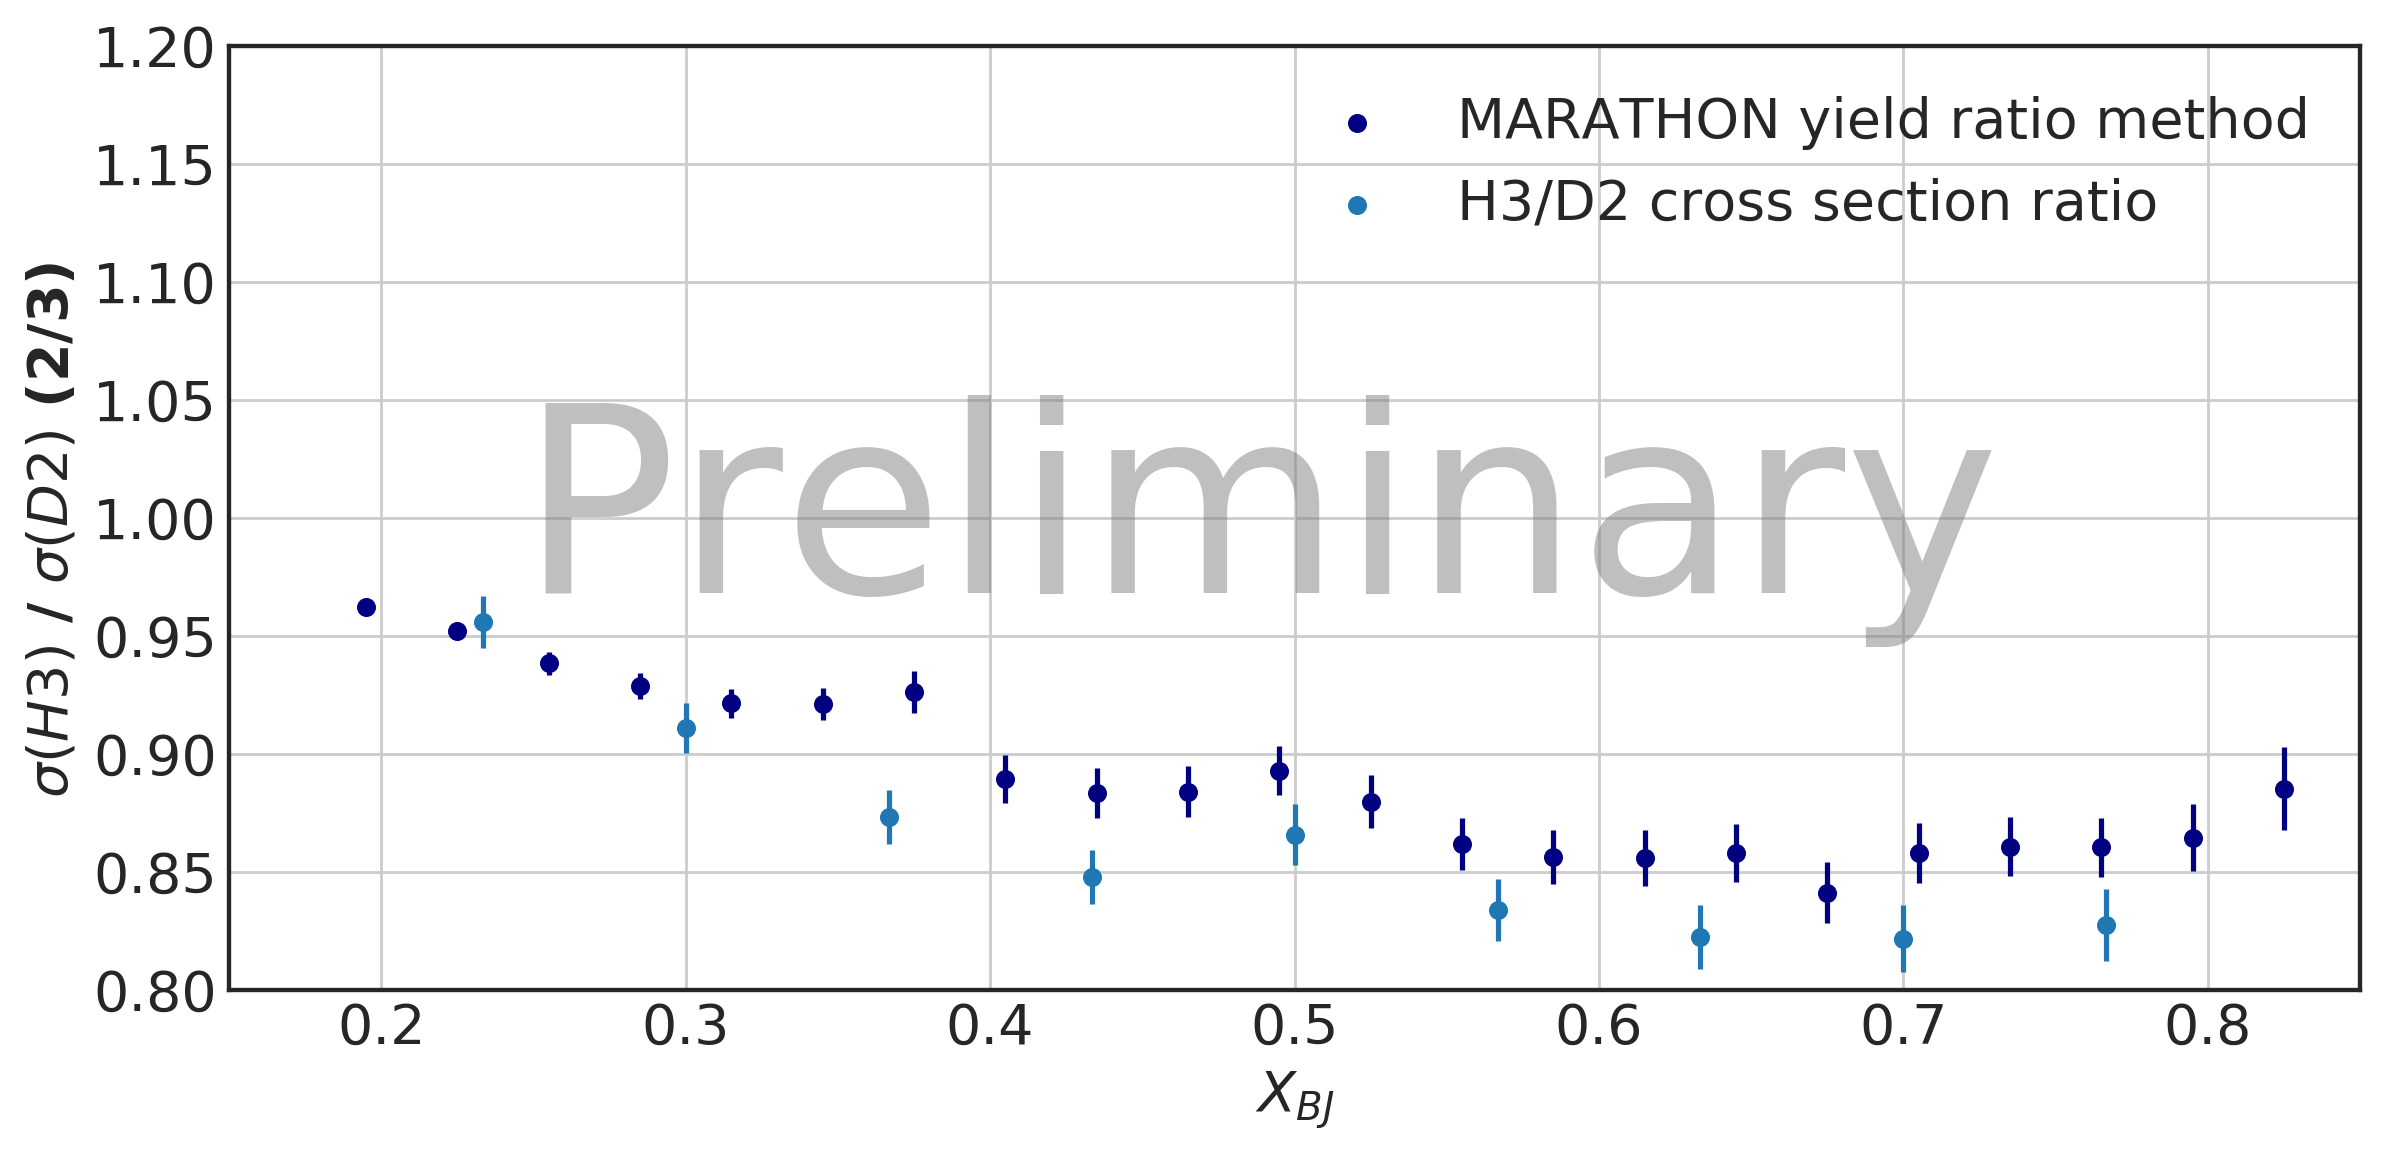

In [55]:


onekin=""
bins="15"
BlankDF = {1: pd.DataFrame()}

He3_4=Yield("He3",bins,"all","Xbjc",onekin )#,BlankDF,1
He3Born=Born(He3_4[0],"He3")
He3Born=NewBorn(He3Born,'He3')
He3Full_4=YieldFull(He3Born)
He3Full_4=modelD(He3Full_4,"He3")

D2_4=Yield("D2",bins,"all","Xbjc",onekin)#,BlankDF,1
D2Born=Born(D2_4[0],"D2")
D2Born=NewBorn(D2Born,'D2')
D2Full_4=YieldFull(D2Born)
D2Full_4=modelD(D2Full_4,"D2")

H3_4=Yield("H3",bins,"all","Xbjc",onekin,He3_4[0],1)
H3Born=Born(H3_4[0],"H3")
H3Born=NewBorn(H3Born,'H3')
H3Full_4=YieldFull(H3Born)
H3Full_4=modelD(H3Full_4,"H3")

EMCHe3=EMC(He3Full_4,"He3",3,D2Full_4,"D2",2,"23")
EMCH3=EMC(H3Full_4,"H3",3,D2Full_4,"D2",2,"3")

EMCHe3,He3103=ISO_Cor_EMC2(EMCHe3,"He3",3,2)

EMCH3,H103=ISO_Cor_EMC2(EMCH3,"H3",3,1)

KPdf=KP()
He3_E03=E03He3()
kpx=KPdf['x']
kpq=KPdf['Q2']

JA_FR=Rnp(EMCHe3["Xbjc"],EMCHe3["Q2"])
JA_FR=np.array(JA_FR)
JA_mar=JA_FR

NMC_FR=NMC_F2np(EMCHe3["Xbjc"],EMCHe3["Q2"])
NMC_FR=np.array(NMC_FR)

EMCHe3=EMCfakeD(EMCHe3,"He3",3)
EMCH3=EMCfakeD(EMCH3,"H3",3)

He3_emcM =modelEMC("He3",3,2,EMCHe3['Xbjc'],EMCHe3['Q2'])

KPIsoHe3 = ISOcor_factor(KPdf['Fn/Fp'],3,2,kpx,He3_emcM['Xbjc'])
He3_emcM["KPIsoEMC"] = ISOcor(He3_emcM["EMC"],KPIsoHe3)

JAIsoHe3 = ISOcor_factor(JA_FR,3,2,EMCHe3['Xbjc'],He3_emcM['Xbjc'])
He3_emcM["JAIsoEMC"] = ISOcor(He3_emcM["EMC"],JAIsoHe3)

NMCIsoHe3 = ISOcor_factor(NMC_FR,3,2,EMCHe3['Xbjc'],He3_emcM['Xbjc'])
He3_emcM["NMCIsoEMC"] = ISOcor(He3_emcM["EMC"],NMCIsoHe3)


NMCIsoHe3_data = ISOcor_factor(NMC_FR,3,2,EMCHe3['Xbjc'],EMCHe3['Xbjc'])
KPIsoHe3_data = ISOcor_factor(KPdf['Fn/Fp'],3,2,kpx,EMCHe3['Xbjc'])


EMCHe3['Iso_EMC_KP'] = ISOcor(EMCHe3['EMC'],KPIsoHe3_data)
EMCHe3['Iso_EMC_NMC'] = ISOcor(EMCHe3['EMC'],NMCIsoHe3_data)


H3_emcM =modelEMC("H3",3,1,EMCH3['Xbjc'],EMCH3['Q2'])

KPIsoH3 = ISOcor_factor(KPdf['Fn/Fp'],3,1,kpx,H3_emcM['Xbjc'])
H3_emcM["KPIsoEMC"] = ISOcor(H3_emcM["EMC"],KPIsoH3)

JAIsoH3 = ISOcor_factor(JA_FR,3,1,EMCH3['Xbjc'],H3_emcM['Xbjc'])
H3_emcM["JAIsoEMC"] = ISOcor(H3_emcM["EMC"],JAIsoH3)

NMCIsoH3 = ISOcor_factor(NMC_FR,3,1,EMCH3['Xbjc'],H3_emcM['Xbjc'])
H3_emcM["NMCIsoEMC"] = ISOcor(H3_emcM["EMC"],NMCIsoH3)

NMCIsoH3_data = ISOcor_factor(NMC_FR,3,1,EMCH3['Xbjc'],EMCH3['Xbjc'])
KPIsoH3_data = ISOcor_factor(KPdf['Fn/Fp'],3,1,kpx,EMCH3['Xbjc'])

EMCH3['Iso_EMC_NMC'] = ISOcor(EMCH3['EMC'],NMCIsoH3_data)
EMCH3['Iso_EMC_KP'] = ISOcor(EMCH3['EMC'],KPIsoH3_data)

from scipy.interpolate import interp1d
ISOerrH3=EMCH3[['Xbjc','Iso_fac_MARA']].copy()

JAH3=interp1d(H3_emcM['Xbjc'],JAIsoH3,fill_value="extrapolate", kind='cubic')
KPH3=interp1d(H3_emcM['Xbjc'],KPIsoH3,fill_value="extrapolate", kind='cubic')
NMCH3=interp1d(H3_emcM['Xbjc'],NMCIsoH3,fill_value="extrapolate", kind='cubic')

ISOerrH3["ISO_JA"] = JAH3(ISOerrH3['Xbjc'])
ISOerrH3["ISO_KP"] = KPH3(ISOerrH3['Xbjc'])
ISOerrH3["ISO_NMC"] = NMCH3(ISOerrH3['Xbjc'])

ISOerrH3["ISO err"] = (ISOerrH3[["ISO_JA","ISO_KP","ISO_NMC","Iso_fac_MARA"]].std(axis=1))


ISOerrHe3=EMCHe3[['Xbjc','Iso_fac_MARA']].copy()

JAHe3=interp1d(He3_emcM['Xbjc'],JAIsoHe3,fill_value="extrapolate", kind='cubic')
KPHe3=interp1d(He3_emcM['Xbjc'],KPIsoHe3,fill_value="extrapolate", kind='cubic')
NMCHe3=interp1d(He3_emcM['Xbjc'],NMCIsoHe3,fill_value="extrapolate", kind='cubic')

ISOerrHe3["ISO_JA"] = JAHe3(ISOerrHe3['Xbjc'])
ISOerrHe3["ISO_KP"] = KPHe3(ISOerrHe3['Xbjc'])
ISOerrHe3["ISO_NMC"] = NMCHe3(ISOerrHe3['Xbjc'])

ISOerrHe3["ISO err"] = (ISOerrHe3[["ISO_JA","ISO_KP","ISO_NMC","Iso_fac_MARA"]].std(axis=1,ddof=1))


'''Calulated cross section total errors'''
D2errs,D2Yerrs,D2Oerrs   =ErrorTables(D2Full_4)
He3errs,He3Yerrs,He3Oerrs=ErrorTables(He3Full_4)
H3errs,H3Yerrs,H3Oerrs   =ErrorTables(H3Full_4)


'''Make Ratios for EMC and A=3 errors'''
He3EMCmodelerror = He3Full_4[["Born111","Born123","Born211"]]/D2Full_4[["Born111","Born123","Born211"]]*2/3
He3EMCmodelerror["Model Error"]=He3EMCmodelerror[["Born111","Born123","Born211"]] .std(axis=1,ddof=1)

He3EMC=EMCHe3[["Xbjc","EMC"]].copy()
He3EMC["Iso EMC"] = He3EMC["EMC"]*EMCHe3['Iso_fac_MARA']
He3EMC["Iso Error"]=ISOerrHe3["ISO err"]
He3EMC.index = He3EMC.index.map(int)
He3EMC["Model Error"]=He3EMCmodelerror["Model Error"]/He3EMC["EMC"]

He3EMC["Stat Error"] = sqrt(He3Yerrs["Stat Err"]**2 + D2Yerrs["Stat Err"]**2)
He3EMC["Total Error"] =sqrt(He3Yerrs["Stat Err"]**2 + D2Yerrs["Stat Err"]**2
                        +He3Yerrs["Dens Cor. Err per"]**2 + D2Yerrs["Dens Cor. Err per"]**2
                        +He3Yerrs["PC Err"]**2  + D2Yerrs["PC Err"]**2
                        +He3Yerrs["ECC Err"]**2 + D2Yerrs["ECC Err"]**2
                        +He3Oerrs["MC_Error"]**2+ D2Oerrs["MC_Error"]**2                        
                        +He3EMC["Model Error"]**2   
                        +He3EMC["Iso Error"]**2   
                           )
H3EMCmodelerror = H3Full_4[["Born111","Born123","Born211"]]/D2Full_4[["Born111","Born123","Born211"]]*2/3
H3EMCmodelerror["Model Error"]=H3EMCmodelerror[["Born111","Born123","Born211"]] .std(axis=1,ddof=1)

H3EMC=EMCH3[["Xbjc","EMC"]].copy()
H3EMC["Iso EMC"] = H3EMC["EMC"]*EMCH3['Iso_fac_MARA']
H3EMC["Iso Error"]=ISOerrH3["ISO err"]
H3EMC.index = H3EMC.index.map(int)
H3EMC["Model Error"]=H3EMCmodelerror["Model Error"]/H3EMC["EMC"]

H3EMC["Stat Error"] = sqrt(H3Yerrs["Stat Err"]**2 + D2Yerrs["Stat Err"]**2)
H3EMC["Total Error"] =sqrt(H3Yerrs["Stat Err"]**2 + D2Yerrs["Stat Err"]**2
                        +H3Yerrs["Dens Cor. Err per"]**2 + D2Yerrs["Dens Cor. Err per"]**2
                        +H3Yerrs["PC Err"]**2  + D2Yerrs["PC Err"]**2
                        +H3Yerrs["ECC Err"]**2 + D2Yerrs["ECC Err"]**2
                        +H3Oerrs["MC_Error"]**2+ D2Oerrs["MC_Error"]**2                        
                        +H3EMC["Model Error"]**2   
                        +H3EMC["Iso Error"]**2   
                           )

Ratiomodelerror = H3Full_4[["Born111","Born123","Born211"]]/He3Full_4[["Born111","Born123","Born211"]]
Ratiomodelerror["Model Error"]=Ratiomodelerror[["Born111","Born123","Born211"]] .std(axis=1,ddof=1)
IsoR=ISOerrH3[["ISO_KP","ISO_NMC","Iso_fac_MARA"]]/ISOerrHe3[["ISO_KP","ISO_NMC","Iso_fac_MARA"]]
IsoR["Iso Error"]=IsoR[["ISO_KP","ISO_NMC","Iso_fac_MARA"]] .std(axis=1,ddof=0)/IsoR["Iso_fac_MARA"]

Ratio=EMCHe3[["Xbjc","Q2"]].copy()
Ratio["Iso fac"]=EMCH3["Iso_fac_MARA"]/EMCHe3["Iso_fac_MARA"]
Ratio.index = Ratio.index.map(int)
Ratio["Sigma R"]= H3Full_4["Sigma Data"]/He3Full_4["Sigma Data"]
Ratio["Sigma R"]= Ratio["Sigma R"]* Ratio["Iso fac"]
Ratio["R"]=H3EMC["EMC"]/He3EMC["EMC"]
Ratio.index = Ratio.index.map(str)
Ratio["Iso Error"]=IsoR["Iso Error"]
Ratio.index = Ratio.index.map(int)
Ratio["Iso R"]=H3EMC["Iso EMC"]/He3EMC["Iso EMC"]
Ratio["Model Error"]=Ratiomodelerror["Model Error"]


Ratio["Stat Error"] = sqrt(H3Yerrs["Stat Err"]**2 + He3Yerrs["Stat Err"]**2)
Ratio["Total Error"] =sqrt(H3Yerrs["Stat Err"]**2 + He3Yerrs["Stat Err"]**2
                        +H3Yerrs["Dens Cor. Err per"]**2 + He3Yerrs["Dens Cor. Err per"]**2
                        +H3Yerrs["PC Err"]**2  + He3Yerrs["PC Err"]**2
                        +H3Yerrs["ECC Err"]**2 + He3Yerrs["ECC Err"]**2
                        +H3Oerrs["MC_Error"]**2+ He3Oerrs["MC_Error"]**2                        
                        +Ratio["Model Error"]**2   
                        +Ratio["Iso Error"]**2   
                           )
Ratio["Total Error nI"] =sqrt(H3Yerrs["Stat Err"]**2 + He3Yerrs["Stat Err"]**2
                        +H3Yerrs["Dens Cor. Err per"]**2 + He3Yerrs["Dens Cor. Err per"]**2
                        +H3Yerrs["PC Err"]**2  + He3Yerrs["PC Err"]**2
                        +H3Yerrs["ECC Err"]**2 + He3Yerrs["ECC Err"]**2
                        +H3Oerrs["MC_Error"]**2+ He3Oerrs["MC_Error"]**2                        
                        +Ratio["Model Error"]**2   
                                                   )


In [52]:
marker_list= [m for i,m in enumerate(markers)]


','

(0.1, 0.9)

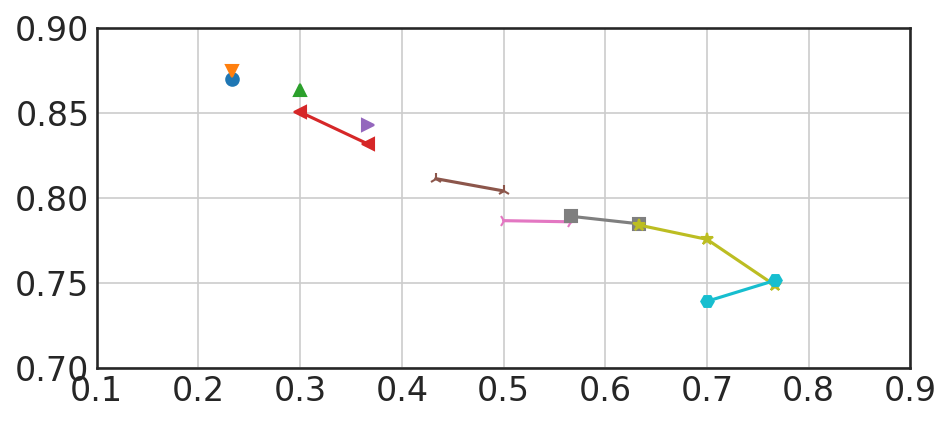

In [70]:
fig = plt.figure(dpi=150,figsize=(7,3))
ax=fig.add_subplot(1,1,1)

for i in D2_4[0].keys():
    
     ax.errorbar(x=D2_4[0][i]["Xbjc"], 
                y = H3_4[0][i]["Yield"]/He3_4[0][i]["Yield"] ,
                marker=marker_list[i+1][0],label=i)
    
  
    
    
    
    
ax.grid(True)
ax.set_ylim(0.7,0.9)
ax.set_xlim(0.1,0.9)


(0.87, 1.095)

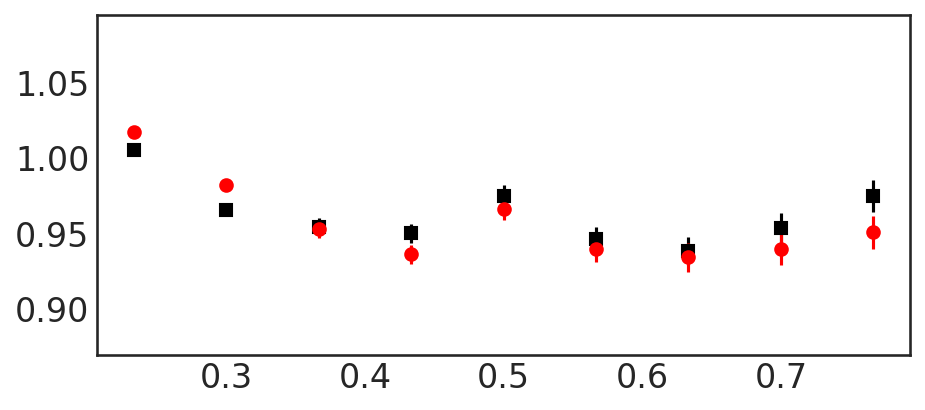

In [67]:
fig = plt.figure(dpi=150,figsize=(7,3))
ax=fig.add_subplot(1,1,1)

ax.errorbar(x=EMCHe3['Xbjc'],y=EMCHe3['Iso_EMC_MARA'],yerr=EMCHe3['D-mc stat errorD2'],
            color='black',marker='s',fmt='s',label="He3 EMC")
ax.errorbar(x=EMCH3['Xbjc'],y=EMCH3['Iso_EMC_MARA'],yerr=EMCH3['D-mc stat errorD2'],
            color='red',marker='o',fmt='s',label="H3 EMC")
ax.set_ylim(0.87,1.095)

In [65]:
EMCH3.keys()

Index(['Xbjc', 'Q2', 'D-mc ratioD2', 'D-mc stat errorD2', 'Sigma DataD2',
       'Sigma Data errD2', 'Sigma Data err noeffD2', 'sigmaD2',
       'Thickness Err perD2', 'Q2H3', 'D-mc ratioH3', 'D-mc stat errorH3',
       'Sigma DataH3', 'Sigma Data errH3', 'Sigma Data err noeffH3', 'sigmaH3',
       'Thickness Err perH3', 'EMC', 'EMC err', 'model EMC', 'Thickness Error',
       'Iso_fac_MARA', 'Iso_EMC_MARA', 'Iso_fac', 'Iso_EMC', 'Iso_mEMC_MARA',
       'Iso_mEMC', 'Iso_fac_JA', 'Iso_EMC_JA', 'fD', 'EMC_aD',
       'EMC_aD_Iso_MARA', 'EMC err aD', 'Thickness Err No D', 'Iso_EMC_NMC',
       'Iso_EMC_KP'],
      dtype='object')